In [7]:
import torch
from transformers import pipeline

model_name = "facebook/bart-large-mnli"

if torch.backends.mps.is_available():  # Check for MPS (Apple Silicon)
    device = torch.device("mps")
    print("Using MPS device")
elif torch.cuda.is_available():  # Check for CUDA (less likely on macOS)
    device = torch.device("cuda")
    print("Using CUDA device")
else:
    device = torch.device("cpu")
    print("Using CPU device")

# Or, more concisely:
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")



Using MPS device
Using device: mps


In [8]:
def load_model(device):
    try:
        classifier = pipeline(
            "zero-shot-classification",
            model=model_name,
            device=device,
            torch_dtype=torch.float16 if str(device) != "cpu" else None # Try float16 for GPU
        )
        return classifier
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

classifier = load_model(device)

if classifier:
    print("Model loaded successfully.")
    # Example usage:
    sequence_to_classify = "one day I will see the world"
    candidate_labels = ['travel', 'cooking', 'dancing']
    hypothesis_template = "This text is about {}."

    result = classifier(sequence_to_classify, candidate_labels=candidate_labels, hypothesis_template=hypothesis_template)
    print(result)

else:
    print("Model loading failed.")

Device set to use mps


Model loaded successfully.
{'sequence': 'one day I will see the world', 'labels': ['travel', 'cooking', 'dancing'], 'scores': [0.9922067523002625, 0.003976492676883936, 0.0038166942540556192]}


In [9]:
theme_list = ["friendship","hope","scarfice","battle","self development", "betrayal", "love", "dialouge"]

In [10]:
classifier (
    "I gave hime a right hook then a left job",
    theme_list,
    multi_label=True
)

{'sequence': 'I gave hime a right hook then a left job',
 'labels': ['battle',
  'self development',
  'dialouge',
  'betrayal',
  'scarfice',
  'hope',
  'friendship',
  'love'],
 'scores': [0.8352148532867432,
  0.6551154255867004,
  0.1977541446685791,
  0.1057865098118782,
  0.03494669497013092,
  0.029008125886321068,
  0.027894755825400352,
  0.0070527102798223495]}

In [11]:
from glob import glob

In [12]:
files = glob('../data/subtitles/*.ass')

In [13]:
files[:1]
print(type(files))

<class 'list'>


In [14]:
with open(files[0], 'r') as file:
    lines = file.readlines()
    lines = lines[27:]
    lines = [ ",".join(line.split(',')[9:]) for line in lines]

In [15]:
lines[:2]

['We are Fighting Dreamers aiming high\n',
 "Fighting Dreamers\\Ndon't care what people think about them\n"]

In [16]:
lines = [line.replace('\\N',' ' ) for line in lines]

In [17]:
lines[:2]

['We are Fighting Dreamers aiming high\n',
 "Fighting Dreamers don't care what people think about them\n"]

In [18]:
" ".join(lines[:10])

"We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive!\n Right here right now (Burn)\n Down a difficult road filled with endless struggles\n Where do you think you are going following someone else's map?\n An insightful crow comes along to tear up the map\n Now open your eyes and take a look at the truth (Yeah!)\n"

In [19]:
int(files[0].split('-')[-1].split('.')[0].strip())

94

In [64]:
pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

In [21]:
import pandas as pd
from glob import glob

def load_subtitles_dataset(dataset_path):
    subtitles_paths = glob(dataset_path + '/*.ass')

    scripts = []
    episode_num = []

    for path in subtitles_paths:
        with open(path, 'r', encoding='utf-8') as files:  # Added encoding for safety
            lines = files.readlines()
            lines = lines[27:]
            lines = [",".join(line.split(',')[9:]) for line in lines]

        lines = [line.replace('\\N', ' ') for line in lines]
        script = " ".join(lines)

        # Extract episode number, assumes format like "something-01.ass"
        try:
            episode = int(path.split('-')[-1].split('.')[0].strip())
        except ValueError:
            print(f"Skipping file with invalid format: {path}")
            continue

        scripts.append(script)
        episode_num.append(episode)

    df = pd.DataFrame.from_dict({"episode": episode_num, "script": scripts})
    return df


In [22]:
dataset_path = "../data/subtitles"
df = load_subtitles_dataset(dataset_path)

In [23]:
df.head()

,episode,script
0,94,We are Fighting Dreamers aiming high\n Fightin...
1,80,We are Fighting Dreamers aiming high\n Fightin...
2,32,"Press down hard on the gas\n That’s right, the..."
3,185,"Rock away your existence,\n Shouting that you ..."
4,191,"Rock away your existence,\n Shouting that you ..."


In [31]:
pip install nltk

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.7 MB/s eta 0:00:00a 0:00:01
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
from nltk import sent_tokenize


In [25]:
# Import nltk
import nltk

# Download the punkt tokenizer
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mubashirmian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
script = df.iloc[0]['script']

In [27]:
script

'We are Fighting Dreamers aiming high\n Fighting Dreamers don\'t care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive!\n Right here right now (Burn)\n Down a difficult road filled with endless struggles\n Where do you think you are going following someone else\'s map?\n An insightful crow comes along to tear up the map\n Now open your eyes and take a look at the truth (Yeah!)\n There\'s nothing to lose, so let\'s GO!!!\n We are Fighting Dreamers aiming high\n Fighting Dreamers don\'t care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive!\n Right here right now (Burn) We\'re gonna do it and do our best!\n Right here right now (Bang) Hit it straight like a line drive!\n Right here right now (Burn) We\'re gonna do it and do our best! BANG!\n My bod

In [46]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mubashirmian/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
from nltk.tokenize import sent_tokenize
script_sentences = sent_tokenize(script)
script_sentences[:3]


["We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh!",
 'Just go my way\n Right here right now (Bang) Hit it straight like a line drive!',
 "Right here right now (Burn)\n Down a difficult road filled with endless struggles\n Where do you think you are going following someone else's map?"]

In [29]:
sentence_batch_size = 20
script_batches = []
for index in range(0,len(script_sentences),sentence_batch_size):
    sent = " ".join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)
    

In [30]:
script_batches[:2]

["We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn)\n Down a difficult road filled with endless struggles\n Where do you think you are going following someone else's map? An insightful crow comes along to tear up the map\n Now open your eyes and take a look at the truth (Yeah!) There's nothing to lose, so let's GO!!! We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn) We're gonna do it and do our best! Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn) We're gonna do it and do our best! BANG! My body movements have final

In [31]:
theme_output = classifier(
    script_batches[:2],
    theme_list,
    multi_lable = True
)

In [32]:
theme_output

[{'sequence': "We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn)\n Down a difficult road filled with endless struggles\n Where do you think you are going following someone else's map? An insightful crow comes along to tear up the map\n Now open your eyes and take a look at the truth (Yeah!) There's nothing to lose, so let's GO!!! We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn) We're gonna do it and do our best! Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn) We're gonna do it and do our best! BANG! My body movemen

In [33]:
# wrangle output
# battle: [0.334,0.444]
themes = {}

for output in theme_output:
    for label,score in zip(output['labels'],output['scores']):
        if label not in themes:
            themes[label] = []
        themes[label].append(score)

In [34]:
themes

{'battle': [0.29333066940307617, 0.29943543672561646],
 'self development': [0.245326429605484, 0.13789716362953186],
 'betrayal': [0.1782618910074234, 0.1292896419763565],
 'dialouge': [0.11965015530586243, 0.1923883557319641],
 'hope': [0.07505359500646591, 0.05916782096028328],
 'scarfice': [0.0398339107632637, 0.051894526928663254],
 'friendship': [0.02618757262825966, 0.09871922433376312],
 'love': [0.022355711087584496, 0.03120780922472477]}

In [35]:
import numpy as np

In [36]:
themes = {key: np.mean(np.array(value)) for key, value in themes.items()}

In [37]:
themes

{'battle': 0.2963830530643463,
 'self development': 0.19161179661750793,
 'betrayal': 0.15377576649188995,
 'dialouge': 0.15601925551891327,
 'hope': 0.0671107079833746,
 'scarfice': 0.04586421884596348,
 'friendship': 0.06245339848101139,
 'love': 0.026781760156154633}

In [38]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    #batch sentences
    sentence_batch_size = 20
    script_batches = []
    for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)

    # run model
    theme_output = classifier(
        script_batches[:2],
        theme_list,
        multi_lable=True
    ) 

    # wrangle
    themes = {}

    for output in theme_output:
        for label,score in zip(output['labels'],output['scores']):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)
    themes = {key: np.mean(np.array(value)) for key, value in themes.items()}
    return themes
    

In [43]:
df.head(2)

,episode,script
0,94,We are Fighting Dreamers aiming high\n Fightin...
1,80,We are Fighting Dreamers aiming high\n Fightin...


In [42]:
output_themes = df['script'].apply(get_themes_inference)

In [41]:
output_themes

0      {'battle': 0.2963830530643463, 'self developme...
1      {'battle': 0.26217008382081985, 'self developm...
2      {'battle': 0.25746137648820877, 'dialouge': 0....
3      {'self development': 0.2663479298353195, 'hope...
4      {'self development': 0.22907540202140808, 'bet...
                             ...                        
213    {'self development': 0.17990980669856071, 'bat...
214    {'self development': 0.27457206696271896, 'dia...
215    {'self development': 0.2999569922685623, 'batt...
216    {'battle': 0.23454400151968002, 'self developm...
217    {'self development': 0.24033448845148087, 'dia...
Name: script, Length: 218, dtype: object

In [5]:
  import pandas as pd

In [44]:
theme_df = pd.DataFrame(output_themes.tolist())

In [36]:
theme_df

,battle,self development,betrayal,dialouge,hope,scarfice,friendship,love
0,0.296383,0.191612,0.153776,0.156019,0.067111,0.045864,0.062453,0.026782
1,0.262170,0.180043,0.125355,0.185510,0.083502,0.073111,0.062465,0.027844
2,0.257461,0.179330,0.072959,0.165440,0.132547,0.091919,0.048768,0.051575
3,0.085470,0.266348,0.093205,0.151552,0.129296,0.071318,0.139711,0.063101
4,0.135569,0.229075,0.232512,0.116959,0.099439,0.055495,0.081251,0.049699
...,...,...,...,...,...,...,...,...
213,0.236457,0.179910,0.068787,0.136980,0.128874,0.064323,0.130262,0.054408
214,0.094003,0.274572,0.028241,0.202414,0.291937,0.035581,0.043983,0.029270
215,0.168248,0.299957,0.122490,0.143540,0.111129,0.052542,0.063279,0.038815
216,0.234544,0.208880,0.195286,0.147324,0.079676,0.067240,0.044279,0.022771


In [47]:
df[theme_df.columns] = theme_df

In [48]:
df.drop('dialouge',axis=1)

,episode,script,battle,self development,betrayal,hope,scarfice,friendship,love
0,94,We are Fighting Dreamers aiming high\n Fightin...,0.296383,0.191612,0.153776,0.067111,0.045864,0.062453,0.026782
1,80,We are Fighting Dreamers aiming high\n Fightin...,0.262170,0.180043,0.125355,0.083502,0.073111,0.062465,0.027844
2,32,"Press down hard on the gas\n That’s right, the...",0.257461,0.179330,0.072959,0.132547,0.091919,0.048768,0.051575
3,185,"Rock away your existence,\n Shouting that you ...",0.085470,0.266348,0.093205,0.129296,0.071318,0.139711,0.063101
4,191,"Rock away your existence,\n Shouting that you ...",0.135569,0.229075,0.232512,0.099439,0.055495,0.081251,0.049699
...,...,...,...,...,...,...,...,...,...
213,154,I want to try and gather the unrestrained wind...,0.236457,0.179910,0.068787,0.128874,0.064323,0.130262,0.054408
214,188,"Rock away your existence,\n Shouting that you ...",0.094003,0.274572,0.028241,0.291937,0.035581,0.043983,0.029270
215,99,We are Fighting Dreamers aiming high\n Fightin...,0.168248,0.299957,0.122490,0.111129,0.052542,0.063279,0.038815
216,103,We are Fighting Dreamers aiming high\n Fightin...,0.234544,0.208880,0.195286,0.079676,0.067240,0.044279,0.022771


In [49]:
theme_output = df.drop(['episode','script'],axis=1).sum().reset_index()
theme_output.columns = ['theme','score']
theme_output

,theme,score
0,battle,38.520410
1,self development,41.522177
2,betrayal,30.589996
3,dialouge,34.413366
4,hope,24.591440
5,scarfice,17.128966
6,friendship,18.481303
7,love,12.752343


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

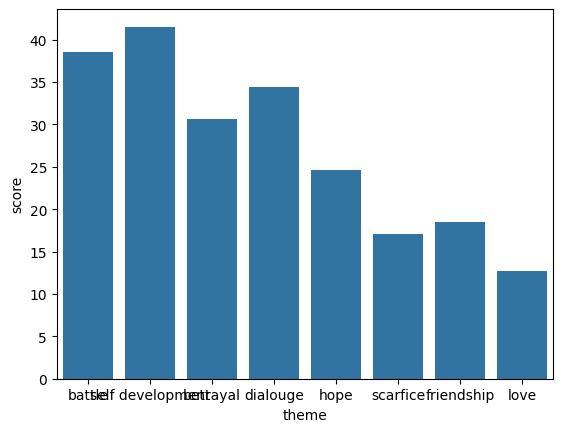

In [51]:
sns.barplot(data = theme_output, x = "theme", y = "score")
plt.show()